## Caso de Estudio - Clasificación

### 1.- Cargar el dataset

Se carga load_digits desde sklearn.datasets y luego se asigna en un objeto

In [1]:
from sklearn.datasets import load_digits

Se revisa la descripcion incluida en el dataset

In [2]:
digits = load_digits()

In [3]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

Se revisa el target del nuevo objeto digitos

In [4]:
digits.target[::100]

array([0, 4, 1, 7, 4, 8, 2, 2, 4, 4, 1, 9, 7, 3, 2, 1, 2, 5])

Se observa forma del arreglo digitos

In [5]:
digits.data.shape

(1797, 64)

Y la forma del arreglo target

In [6]:
digits.target.shape

(1797,)

### 2.- Visualizar los datos

Visualicemos los datos utilizando matplotlib

In [9]:
import matplotlib.pyplot as plt

Se crea una cuadricula para poder visualizar los arreglos

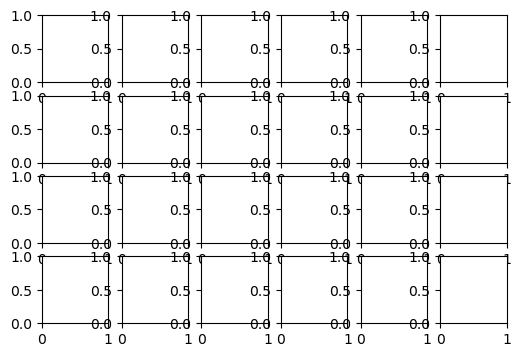

In [10]:
fig, ax = plt.subplots(nrows=4, ncols=6, figsize=(6,4))

Ahora vamos a usar un for para iterar en paralelo a traves de los 24 cuadritos y traer las priemras 24 imagenes

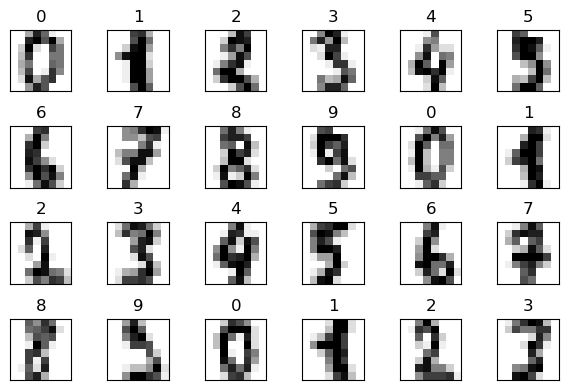

In [11]:
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(6,4))
for item in zip(axes.ravel(), digits.images, digits.target):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])
    axes.set_yticks([])
    axes.set_title(target)
plt.tight_layout()

### 3.- Separar el dataset para entrenamientos y pruebas

Ahora se importar train_test_split desde sklearn.model_selection

In [12]:
from sklearn.model_selection import train_test_split

Y a continuación se genera el split entre test y train

In [13]:
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=11)

Veamos las shapes de nuestros sets para X (muestras)

In [14]:
x_train.shape

(1347, 64)

In [15]:
x_test.shape

(450, 64)

### 4.- Crear el modelo

Ahora importamos el KNeighborsClassifier

In [16]:
from sklearn.neighbors import KNeighborsClassifier

y armamos un objeto llamado KNN de este Clasificador

In [17]:
knn = KNeighborsClassifier()

### 5.- Entrenar el modelo

Ahora se ajusta el método fit para cargar los datos en el estimador

In [18]:
knn.fit(X=x_train, y=y_train)

KNeighborsClassifier()

### 6.- Predecir clases de dígitos

Arma un objeto llamdo prediccion

In [19]:
prediccion = knn.predict(X=x_test)

Arma un objeto llamado esperado

In [20]:
esperado = y_test

Comparemos predicho vs esperado

In [21]:
prediccion[:20]

array([0, 4, 9, 9, 3, 1, 4, 1, 5, 0, 4, 9, 4, 1, 5, 3, 3, 8, 5, 6])

In [22]:
esperado[:20]

array([0, 4, 9, 9, 3, 1, 4, 1, 5, 0, 4, 9, 4, 1, 5, 3, 3, 8, 3, 6])

Se crea una comprension de lista para localizar todas las predicciones incorrectas

In [23]:
x = [(p,e) for (p,e) in zip(prediccion, esperado) if p != e]

In [24]:
x

[(5, 3),
 (8, 9),
 (4, 9),
 (7, 3),
 (7, 4),
 (2, 8),
 (9, 8),
 (3, 8),
 (3, 8),
 (1, 8)]

## Clasificación parte 2 - Dataset de digitos

### 7.- Metricas para la exactitud del modelo

Se usa knn.score para conocer que tan bien se desempeño el estimador

In [25]:
print(f'{knn.score(x_test, y_test):.2%}')

97.78%


Ahora vamos a ahacer una matriz de confusion para ver los hits y misses para una clase dada, esto por medio de la funcion matriz de confusión desde sklearn metricsModule

In [26]:
from sklearn.metrics import confusion_matrix

Y ahora se crea la matriz de confusion

In [27]:
confusion = confusion_matrix(y_true=esperado, y_pred=prediccion)

In [28]:
confusion

array([[45,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 45,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 54,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 42,  0,  1,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 49,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 38,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 42,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 45,  0,  0],
       [ 0,  1,  1,  2,  0,  0,  0,  0, 39,  1],
       [ 0,  0,  0,  0,  1,  0,  0,  0,  1, 41]], dtype=int64)

Ahora se realizara un reporte de calsificación, importando classification_report desde sklearn.metrics

In [29]:
from sklearn.metrics import classification_report

Y ahora se crea una comprension de lista que retorne los nombres de los digitos

In [30]:
nombres = [str(nombre) for nombre in digits.target_names]

In [31]:
nombres

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

Y se realiza el reporte de clasificacion

In [32]:
print(classification_report(y_true=esperado, y_pred=prediccion, target_names=nombres))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.98      1.00      0.99        45
           2       0.98      1.00      0.99        54
           3       0.95      0.95      0.95        44
           4       0.98      0.98      0.98        50
           5       0.97      1.00      0.99        38
           6       1.00      1.00      1.00        42
           7       0.96      1.00      0.98        45
           8       0.97      0.89      0.93        44
           9       0.98      0.95      0.96        43

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



Y ahora se creara un heatmap con la matriz de confusion

In [33]:
import pandas as pd

In [34]:
confusion_df = pd.DataFrame(confusion)

In [35]:
confusion_df

,0,1,2,3,4,5,6,7,8,9
0,45,0,0,0,0,0,0,0,0,0
1,0,45,0,0,0,0,0,0,0,0
2,0,0,54,0,0,0,0,0,0,0
3,0,0,0,42,0,1,0,1,0,0
4,0,0,0,0,49,0,0,1,0,0
5,0,0,0,0,0,38,0,0,0,0
6,0,0,0,0,0,0,42,0,0,0
7,0,0,0,0,0,0,0,45,0,0
8,0,1,1,2,0,0,0,0,39,1
9,0,0,0,0,1,0,0,0,1,41


In [36]:
import seaborn as sns

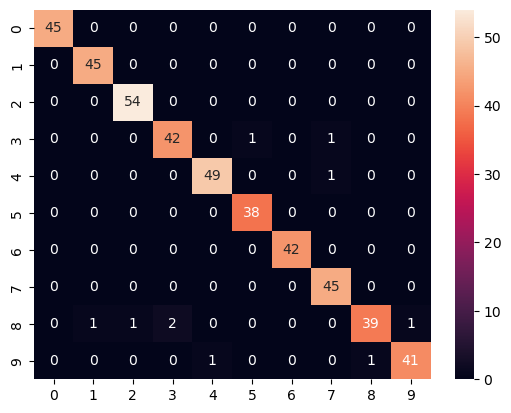

In [37]:
axes = sns.heatmap(confusion_df, annot=True)

### 8.- K-Fold Validación Cruzada

Se importa kfold desde sklearn.modelselection

In [38]:
from sklearn.model_selection import KFold

In [39]:
kfold = KFold(n_splits=20, shuffle=True, random_state=11)

Ahora se importa cross_val_score

In [40]:
from sklearn.model_selection import cross_val_score

Y creamos un objeto llamado puntuacion para evaluar el modelo

In [41]:
puntuacion = cross_val_score(estimator=knn, X=digits.data, y=digits.target, cv=kfold)

In [42]:
puntuacion

array([0.98888889, 0.97777778, 0.98888889, 1.        , 0.97777778,
       1.        , 0.97777778, 0.98888889, 1.        , 0.97777778,
       1.        , 0.98888889, 0.96666667, 0.98888889, 0.97777778,
       0.98888889, 1.        , 1.        , 1.        , 0.97752809])

In [43]:
puntuacion.mean()

0.9883208489388267

In [44]:
puntuacion.std()

0.01024188217132169

### 9.- Varios Modelos hasta dar con el bueno

Se importa los modelos SVC y GaussianNB

In [45]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

Se crean los estimadores en un diccionario

In [46]:
estimadores = {"KNeighborsClassifier":knn, "SVC":SVC(gamma="scale"), "GuassianNB":GaussianNB()}

Se ejecutan los modelos con un for

In [47]:
for nombre_estimador, objeto_estimador in estimadores.items():
    kfold = KFold(n_splits=20, random_state=11, shuffle=True)
    puntuacion = cross_val_score(estimator=objeto_estimador, X=digits.data, y=digits.target, cv=kfold)
    print(f'{nombre_estimador:>20} - ' + f'Promedio = {puntuacion.mean():.2%} | ' + f'Desviación estandar = {puntuacion.std():.2%}')

KNeighborsClassifier - Promedio = 98.83% | Desviación estandar = 1.02%
                 SVC - Promedio = 98.78% | Desviación estandar = 1.22%
          GuassianNB - Promedio = 84.30% | Desviación estandar = 4.35%


### 10.- Ajustar Hiperparametros

Se ajusta el hiperparametro para ver si se obtine una mejor exactitud

In [48]:
for k in range(1,20,2):
    kfold = KFold(n_splits=20, random_state=11, shuffle=True)
    knn = KNeighborsClassifier(n_neighbors=k)
    puntuacion = cross_val_score(estimator=knn, X=digits.data, y=digits.target, cv=kfold)
    print(f'k = {k:<2} - ' + f'Promedio = {puntuacion.mean():.2%} | ' + f'Desviación estandar = {puntuacion.std():.2%}')

k = 1  - Promedio = 98.83% | Desviación estandar = 0.96%
k = 3  - Promedio = 98.78% | Desviación estandar = 1.16%
k = 5  - Promedio = 98.83% | Desviación estandar = 1.02%
k = 7  - Promedio = 98.50% | Desviación estandar = 1.23%
k = 9  - Promedio = 98.39% | Desviación estandar = 1.25%
k = 11 - Promedio = 98.39% | Desviación estandar = 1.14%
k = 13 - Promedio = 98.16% | Desviación estandar = 1.18%
k = 15 - Promedio = 98.11% | Desviación estandar = 1.37%
k = 17 - Promedio = 97.66% | Desviación estandar = 1.27%
k = 19 - Promedio = 97.61% | Desviación estandar = 1.43%
